# **ĐỒ ÁN THỰC HÀNH - LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU** 

### Bảng thành viên
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>21120464<center>  | <center>Nguyễn Quốc Hưng<center> |
| <center>21120486<center>  |   <center>Võ Minh Khuê<center>   | 
| <center>21120091<center>  |<center>Hồ Sỹ Kiên<center> |

## Import libraries

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from langdetect import detect

## 1. Data collection

## 1. Data collection

### About Dataset
- This dataset is about fatalities in the Israeli-Palestinian conflict from 2000 to 2023.
- Author : Willian Oliveira Gibin and Asaniczka.
- Usability : 10000
- License: CC0: Public Domain

## 2. Data pre-processing and exploration

In [2]:
# Read file csv
fatality_df = pd.read_csv('Data/fatalities_isr_pse_conflict_2000_to_2023.csv')
fatality_df.head(5)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


### 2.0. How many rows/columns are there in the dataset?

In [3]:
# Number of rows and columns
n_rows, n_cols = fatality_df.shape
n_rows, n_cols

(11124, 16)

**Observation** 
* This dataset has 11124 rows and 16 columns.

### 2.1. What is the meaning of each row?
- Each row points out the specific information about the fatality of one person related to the war of Israel and Palestine.

### 2.2. Are there duplicated rows?

### 2.7. Handle missing data & Convert data
- As we can see, the values missing rate of `ammunition` is approximately 50%. We can consider removing this column.
- By observing the result of `.info()`, there are some columns that need to be converted:
  - `date_of_event`, `date_of_death`: `Datetime`

### 2.7. With each numerical column, how are values distributed?

### 2.8. With each categorical column, how are values distributed?

In [ ]:
# The meaning of each column?

In [4]:
duplicate_rows = fatality_df[fatality_df.duplicated()]
duplicate_rows

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
9373,Name unknown to B'Tselem,2003-01-13,NaN,Palestinian,Nitzana,Israel,Israel,2003-01-13,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed by IDF gunfire after he crossed into Is...
9985,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Karni Checkpoint,Gaza,Gaza Strip,2002-05-05,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,Killed while trying to cross the Gaza perimete...
9986,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Kissufim,Khan Yunis,Gaza Strip,2002-05-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed after opening fire at soldiers at the c...
10234,Name unknown to B'Tselem,2002-04-01,NaN,Palestinian,Jenin R.C.,Jenin,West Bank,2002-04-01,NaN,Unknown,NaN,NaN,NaN,NaN,Israeli security forces,"Killed during ""Operation Defensive Shield."""
10817,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10818,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10824,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN


In [5]:
#Drop duplicated rows
fatality_df = fatality_df.drop_duplicates()

#Check again
duplicate_rows = fatality_df[fatality_df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
if num_duplicates == 0:
    print(f'There isn\'t any duplicated rows in the dataset.')

There isn't any duplicated rows in the dataset.


### 2.5. What is the meaning of each column?

|No.| Column Name | <center>Description<center> ||
|--|------| ---| --- |
|1|name|Name of the casualty|
|2|date_of_event|Specific date that the casualty happened|
|3|age|Age of the casualty|
|4|citizenship|Nationality of the casualty|
|5|event_location|Specific location or name of an event| 
|6|event_location_district|The district where the event took place| 
|7|event_location_region| the general geographical region where the event occurred|
|8|date_of_death|The date that the person died since the date_of_event|
|9|gender|Gender of the casualty| 
|10|took_part_in_the_hostilities| Did the casualty join the war?(Civilians or not?)| 
|11|place_of_residence|Specifies the specific place associated with the residence of the casualty.| 
|12|place_of_residence_district|Indicates the district associated with the place of the casualty.| 
|13|type_of_injury|The way that the casualty was injured or killed| 
|14|ammunition|Describes the type of ammunition associated with casualties| 
|15|killed_by|Force that made the casualty to the person in this row|
|16|notes|More information about the casualty| 

### 2.6. What is the current data type of each column?

In [6]:
len(fatality_df['name'])

11117

In [7]:
fatality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11117 non-null  object 
 1   date_of_event                 11117 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11117 non-null  object 
 4   event_location                11117 non-null  object 
 5   event_location_district       11117 non-null  object 
 6   event_location_region         11117 non-null  object 
 7   date_of_death                 11117 non-null  object 
 8   gender                        11103 non-null  object 
 9   took_part_in_the_hostilities  9687 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10827 non-null  object 
 13  ammuni

### 2.7. Handle missing data & Convert data
- As we can see, the values missing rate of `ammunition` is approximately 50%. We can consider removing this column.
- By observing the result of `.info()`, there are some columns that need to be converted:
  - `date_of_event`, `date_of_death`: `Datetime`

In [8]:
# Convert 'date_of_event', 'date_of_death' columns to datetime type
fatality_df['date_of_event'] = pd.to_datetime(fatality_df['date_of_event'])
fatality_df['date_of_death'] = pd.to_datetime(fatality_df['date_of_death'])

In [9]:
# Drop 'ammunition' column
del fatality_df['ammunition']

In [10]:
# Checking result
fatality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11117 entries, 0 to 11123
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11117 non-null  object        
 1   date_of_event                 11117 non-null  datetime64[ns]
 2   age                           10995 non-null  float64       
 3   citizenship                   11117 non-null  object        
 4   event_location                11117 non-null  object        
 5   event_location_district       11117 non-null  object        
 6   event_location_region         11117 non-null  object        
 7   date_of_death                 11117 non-null  datetime64[ns]
 8   gender                        11103 non-null  object        
 9   took_part_in_the_hostilities  9687 non-null   object        
 10  place_of_residence            11056 non-null  object        
 11  place_of_residence_district   110

### 2.7. With each numerical column, how are values distributed?

For columns with numeric data types, we will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

We will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `fatality_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [11]:
# Define num_col_info_df
num_col_info_df = None

# Define missing ratio
def missing_ratio(series):
    return series.isna().sum() / len(series)

# Define lower quartile
def lower_quartile(series):
    return series.quantile(0.25)

# Define upper quartile
def upper_quartile(series):
    return series.quantile(0.75)

#Define median
def median(series):
    return series.median()

num_col_info_df = fatality_df.select_dtypes(include=['int64', 'float64'])

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

num_col_info_df

,age
missing_ratio,0.010974
min,1.000000
lower_quartile,19.000000
median,23.000000
upper_quartile,31.000000
max,112.000000


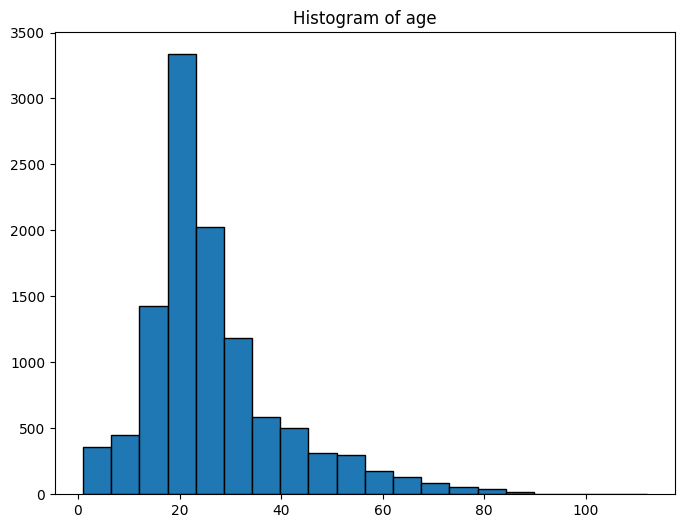

In [12]:
# Histogram for each column of numbericals
numerical_columns = fatality_df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(fatality_df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

There are missing values in `age` column, so we can fill in these missing values with median value.

In [13]:
# Replace None with nan since .fillna() working with nan
fatality_df['age'] = fatality_df['age'].replace('None', np.nan)
    
# Replace all NaN values with the median of the column values.
fatality_df['age'] = fatality_df['age'].fillna(fatality_df['age'].median())

# check the result
fatality_df['age'].info()

<class 'pandas.core.series.Series'>
Index: 11117 entries, 0 to 11123
Series name: age
Non-Null Count  Dtype  
--------------  -----  
11117 non-null  float64
dtypes: float64(1)
memory usage: 173.7 KB


### 2.8. With each categorical column, how are values distributed?

After handling numeric columns, we will handle categorical columns which have type `object`. For these columns, we calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values).
- The distribution of values (we do not consider missing values): we use a dictionary to store , key is the value, value is the distribution of values

We will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `fatality_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

In [14]:
# Setting view
pd.set_option('display.max_colwidth', 200) # For clearly
pd.set_option('display.max_columns', None) # For clearly

# Define cat_col_info_df
cat_col_info_df = fatality_df.select_dtypes(include='object')

# Define num values
def num_diff_vals(series):
    return len(series.dropna().unique())

# Define distribution
def distribution(series):
    return series.dropna().value_counts().to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_diff_vals, distribution])
cat_col_info_df

,name,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,killed_by,notes
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.001259,0.128632,0.005487,0.005487,0.026086,0.0,0.024917
num_diff_vals,11083,4,494,20,3,2,5,580,20,13,3,6744
distribution,"{'Name unknown to B'Tselem': 16, ''Ali Ahmad 'Ali al-'Aidy': 2, 'Samir 'Ali Ibrahim Abu Msalam': 2, 'Yusef Mahmoud Rizeq Abu Taha': 2, 'Ahmad Radwan': 2, 'Muhammad Mahmoud Rizeq Abu Taha': 2, 'Riz...","{'Palestinian': 10085, 'Israeli': 1029, 'Jordanian': 2, 'American': 1}","{'Gaza City': 2232, 'Rafah': 832, 'Khan Yunis': 538, 'Jabalya R.C.': 477, 'Beit Lahiya': 471, 'Jabalya': 411, 'Beit Hanoun': 409, 'Nablus': 293, 'al-Bureij R.C.': 240, 'Deir al-Balah': 220, 'Jerus...","{'Gaza': 2434, 'North Gaza': 1910, 'Khan Yunis': 1393, 'Rafah': 1066, 'Deir al-Balah': 854, 'Israel': 678, 'Nablus': 647, 'Jenin': 508, 'Ramallah and al-Bira': 350, 'Hebron': 347, 'Tulkarm': 254, ...","{'Gaza Strip': 7731, 'West Bank': 2708, 'Israel': 678}","{'M': 9680, 'F': 1423}","{'No': 4653, 'Yes': 3465, 'Israelis': 771, 'Unknown': 598, 'Object of targeted killing': 200}","{'Gaza city': 2283, 'Rafah': 892, 'Khan Yunis': 717, 'Jabalya R.C.': 565, 'Beit Lahiya': 479, 'Jabalya': 384, 'Beit Hanun': 352, 'Nablus': 244, 'a-Nuseirat Camp': 238, 'al-Bureij R.C.': 227, 'Deir...","{'Gaza': 2453, 'North Gaza': 1831, 'Khan Yunis': 1367, 'Rafah': 1097, 'Deir al-Balah': 875, 'Israel': 726, 'Nablus': 621, 'Jenin': 540, 'Hebron': 380, 'Ramallah and al-Bira': 295, 'Tulkarm': 258, ...","{'gunfire': 9843, 'explosion': 555, 'shelling': 311, 'stabbing': 48, 'house demolition': 25, 'hit by a vehicle': 18, 'beating': 9, 'stones throwing': 6, 'fire': 4, 'being bludgeoned with an axe': ...","{'Israeli security forces': 9993, 'Palestinian civilians': 1028, 'Israeli civilians': 96}","{'Killed during ""Operation Defensive Shield.""': 112, 'Killed during operation ""Days of Repentance"".': 88, 'Killed at police station near the Legislative Council building.': 88, 'Killed during an e..."


In [15]:
# Selecting categorical columns
categorical_columns = fatality_df.select_dtypes(include=['object']).columns

# Show a few unique values for each categorical column
for column in categorical_columns:
    unique_values = fatality_df[column].unique()[:5] 
    print(f"Unique values for {column}: {unique_values}")
    print("\n")

Unique values for name: ["'Abd a-Rahman Suleiman Muhammad Abu Daghash"
 "Usayed Farhan Muhammad 'Ali Abu 'Ali" "'Abdallah 'Imad Sa'ed Abu Hassan"
 'Durgham Muhammad Yihya al-Akhras' "Raafat 'Omar Ahmad Khamaisah"]


Unique values for citizenship: ['Palestinian' 'Israeli' 'Jordanian' 'American']


Unique values for event_location: ['Nur Shams R.C.' 'Kfar Dan' "'Aqbat Jaber R.C." 'Jenin R.C.' 'Gaza City']


Unique values for event_location_district: ['Tulkarm' 'Jenin' 'Jericho' 'Gaza' 'Hebron']


Unique values for event_location_region: ['West Bank' 'Gaza Strip' 'Israel']


Unique values for gender: ['M' 'F' nan]


Unique values for took_part_in_the_hostilities: [nan 'No' 'Yes' 'Unknown' 'Israelis']


Unique values for place_of_residence: ['Nur Shams R.C.' 'al-Yamun' "'Aqbat Jaber R.C." 'Jenin' 'Khan Yunis']


Unique values for place_of_residence_district: ['Tulkarm' 'Jenin' 'Jericho' 'Khan Yunis' 'Hebron']


Unique values for type_of_injury: ['gunfire' 'stabbing' 'hit by a vehicle' 'exp

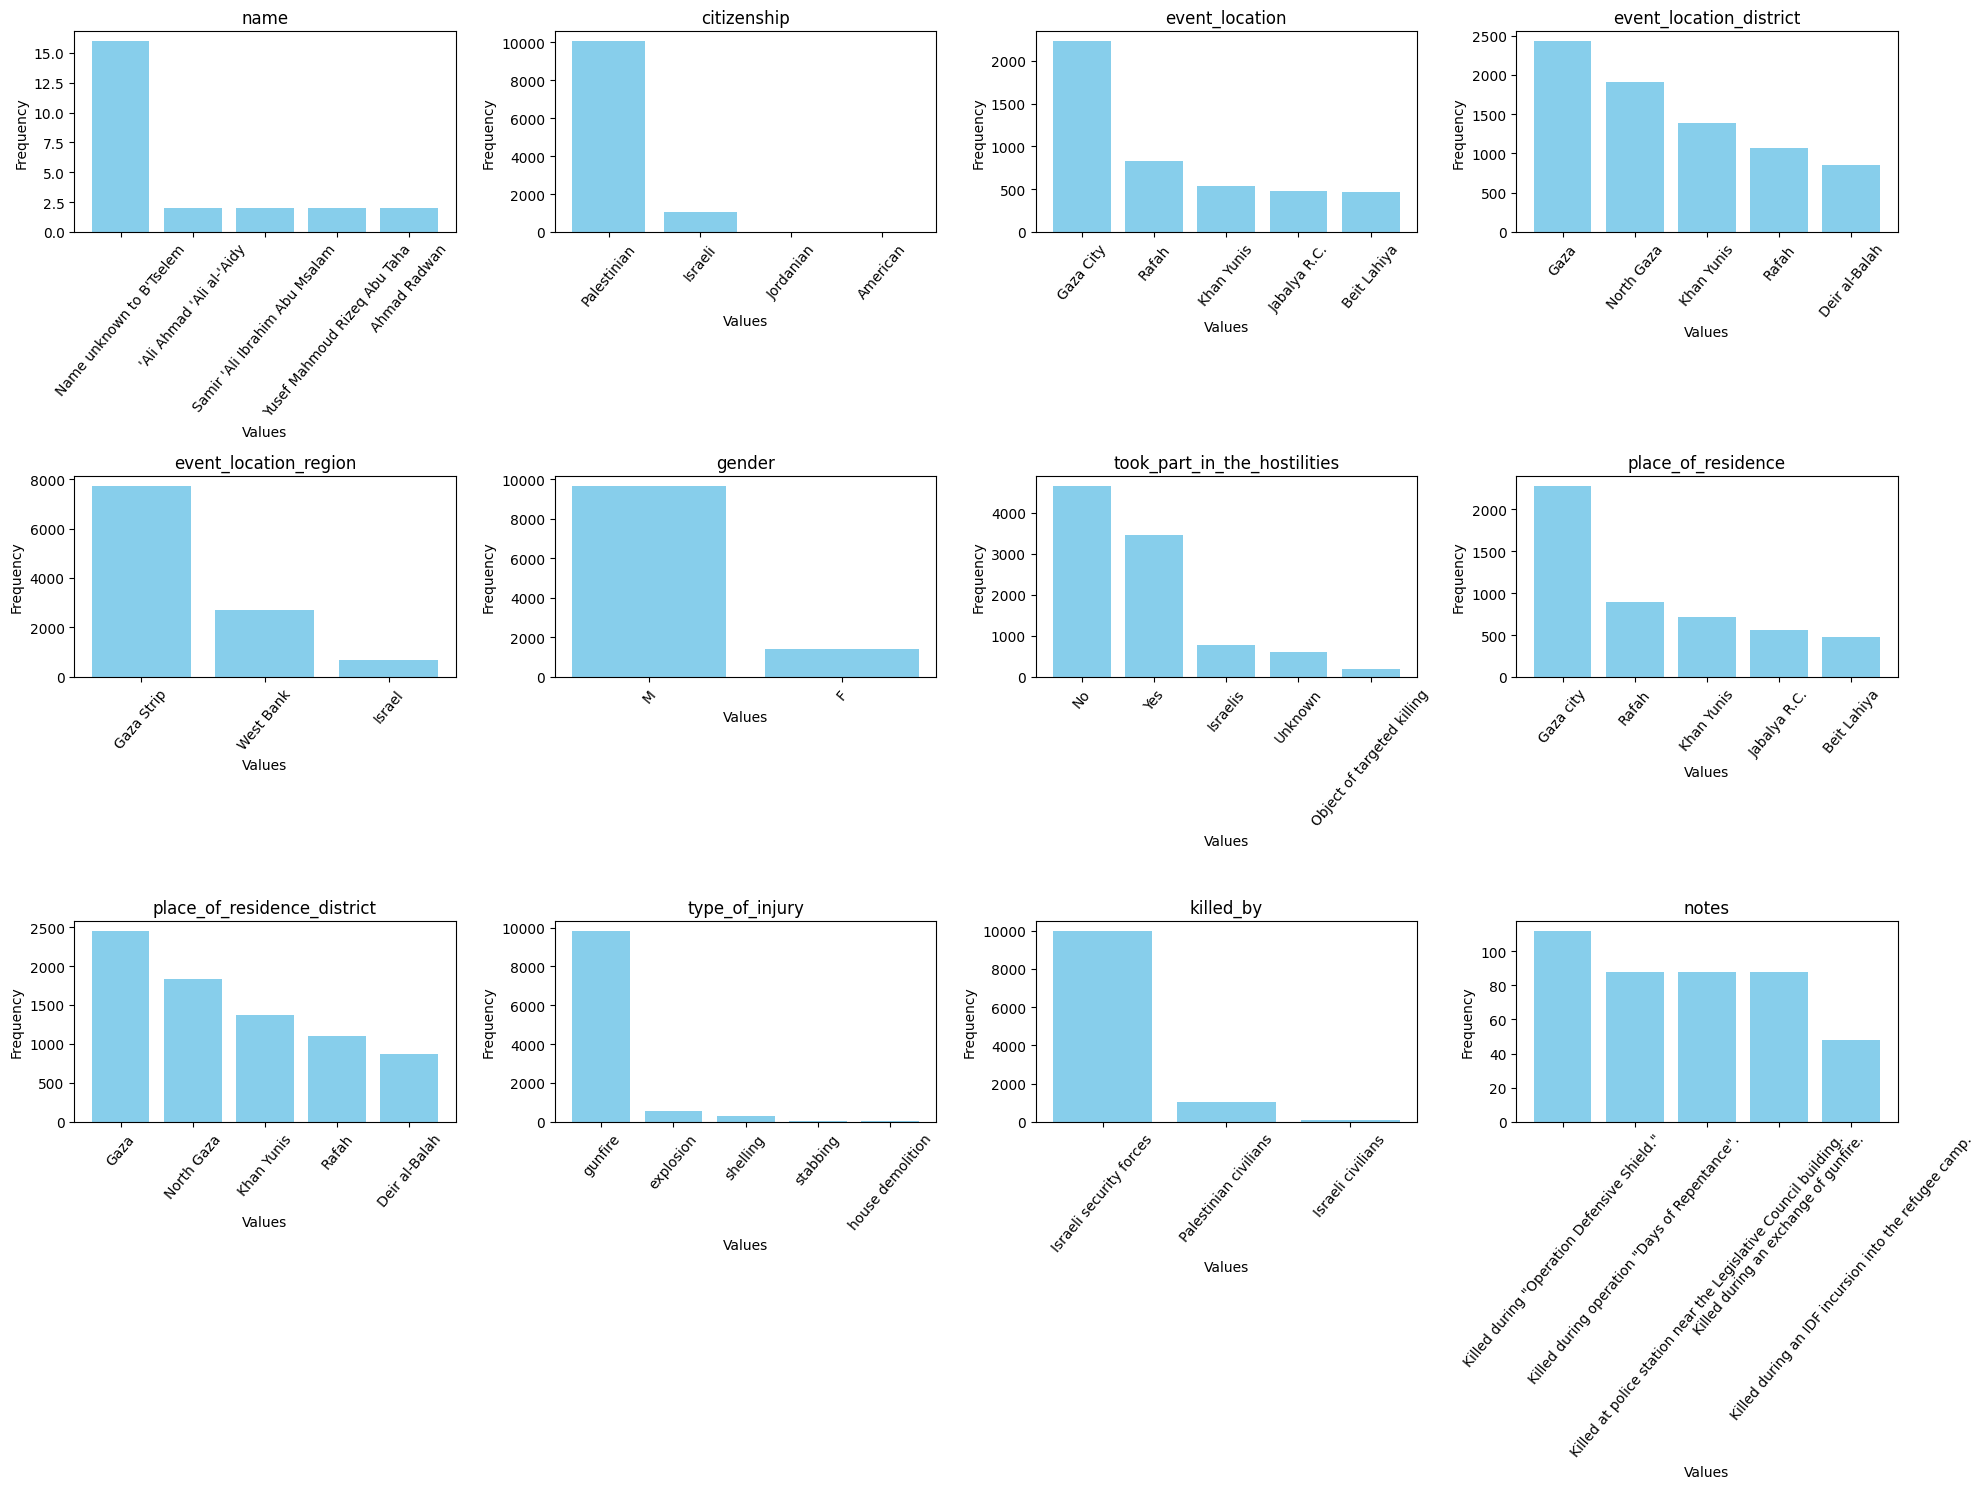

In [16]:
# Visualize the 5 values with the highest frequency of each column
fig, ax = plt.subplots(3, 4, figsize=(20,15))
ax = ax.flatten()

index = 0
for column, data in cat_col_info_df.items():
    values = data['distribution']
    sorted_values = sorted(values.items(), key=lambda x: x[1], reverse=True)[:5]  # Get top 5 values
    
    top_labels = [x[0] for x in sorted_values] # Get the label
    top_counts = [x[1] for x in sorted_values] # Get the value
    
    ax[index].bar(top_labels, top_counts, color='skyblue')
    ax[index].set_title(f'{column}')
    ax[index].set_xlabel('Values')
    ax[index].set_ylabel('Frequency')
    ax[index].set_xticks(range(len(top_labels)))  # Set custom x-ticks positions
    ax[index].set_xticklabels(top_labels, rotation=50)  # Set custom x-tick labels with rotation
    index += 1
plt.tight_layout()
plt.show()

In [17]:
# Abnormal?

## 3. Ask meaningful questions

### Question 1. What is the trend in the age distribution of casualties in the dataset?
Benefits of finding the answer: Understanding the age distribution can provide insights into whether certain age groups are more vulnerable or involved in the events, which may inform targeted interventions or policies.

#### Preprocess
1. Check for missing or invalid age values: Identify and handle any missing or invalid age entries in the dataset.
2. Group ages into bins: Categorize ages into bins (e.g., 0-10, 11-20, etc.) for a more concise and interpretable age distribution.

In [18]:
# Check for missing or invalid age values
fatality_df = fatality_df.dropna(subset=['age'])  # Drop rows with missing age values

# Group ages into bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fatality_df['age_group'] = pd.cut(fatality_df['age'], bins=age_bins)

#### Analysis
1. Plot a histogram: Visualize the age distribution using a histogram to observe the overall pattern.
2. Calculate descriptive statistics: Compute descriptive statistics such as the mean and median to summarize central tendencies.

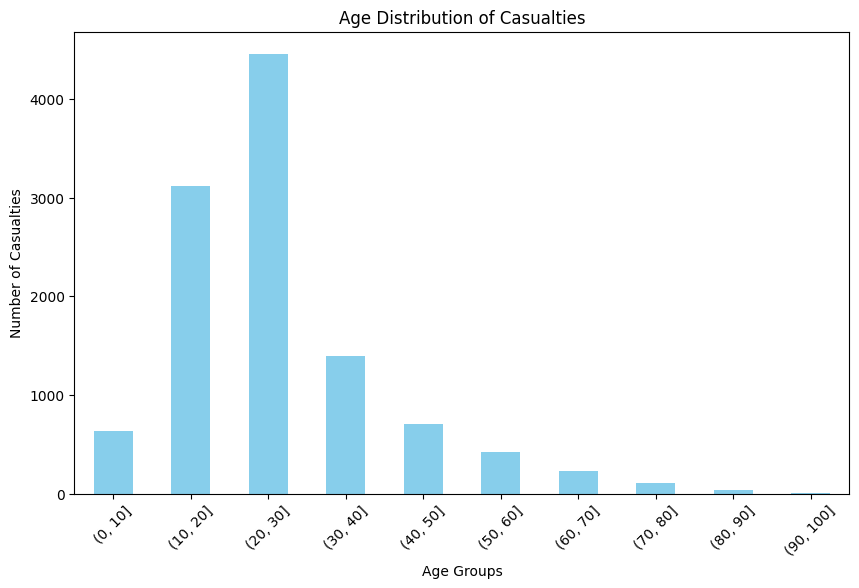

Mean Age: 26.70
Median Age: 23.00


In [19]:
# Plot a histogram
plt.figure(figsize=(10, 6))
fatality_df['age_group'].value_counts(sort=False).plot(kind='bar', color='skyblue')
plt.title('Age Distribution of Casualties')
plt.xlabel('Age Groups')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()

# Calculate descriptive statistics
mean_age = fatality_df['age'].mean()
median_age = fatality_df['age'].median()

print(f'Mean Age: {mean_age:.2f}')
print(f'Median Age: {median_age:.2f}')

Comment: 
- The age group with the highest number of casualties is between 20 and 30. And the number of casualties decreases with age.
- It can be seen that the casualties are young.

### Question 2. What additional information from the "notes" column provides context or insights into specific casualties or events?
Benefits of finding the answer: Analyzing the notes column can reveal additional details that may not be captured in other columns, providing a more comprehensive understanding of individual cases and the overall context of the events.

#### Preprocessing
1. Explore and extract relevant information: Examine the "notes" column to identify patterns, keywords, or specific details that provide context or insights.
2. Clean and preprocess text: Apply text preprocessing techniques, such as removing stopwords, punctuation, and irrelevant characters, to enhance the readability and extract meaningful information.

In [20]:
# Explore and extract relevant information from the "notes" column
notes_text = ' '.join(fatality_df['notes'].astype(str))

# Clean and preprocess text
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=list(stop_words))  # Convert set to list
X = vectorizer.fit_transform([notes_text])

#### Analysis
1. Summarize key information: Create summaries or key insights from the extracted information in the "notes" column.
2. Use Natural Language Processing (NLP) techniques: Apply NLP methods like sentiment analysis, named entity recognition, or topic modeling to extract and categorize information from the text.

In [21]:
# Summarize key information
print("Top 5 most frequent words in the 'notes' column:")
feature_names = vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1
top_words = [feature_names[i] for i in word_frequencies.argsort()[-5:][::-1]]
print(top_words)

# Topic modeling using Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)
feature_names = vectorizer.get_feature_names_out()
print("\nTop words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-5:][::-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Top 5 most frequent words in the 'notes' column:
['killed', 'home', 'family', 'soldiers', 'military']

Top words for each topic:
Topic #1: killed, home, family, soldiers, military
Topic #2: 00, תחנת, 09, פעיל, עם
Topic #3: 00, תחנת, 09, פעיל, עם


Comment: 
- Topic #1: The words 'killed,' 'home,' 'family,' 'soldiers,' and 'military' are dominant in this topic, suggesting a focus on casualties, home, and military activities.
- The LDA model captures relevant terms.
- Topic #2 and Topic #3: These topics seem to contain non-English words, possibly due to the dataset containing multiple languages. Additional preprocessing may be needed to handle multilingual content.

### Question 3. 